In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [3]:
df_train =pd.read_csv('train_Inceptez20.csv')
df_test =pd.read_csv('test_Inceptez20.csv')

In [4]:
df = pd.concat([df_train,df_test],axis = 0)

In [5]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [6]:
from collections import Counter

In [7]:
Counter(df.is_claim)

Counter({0.0: 46771,
         1.0: 3229,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
       

In [8]:
import seaborn as sns

<AxesSubplot:>

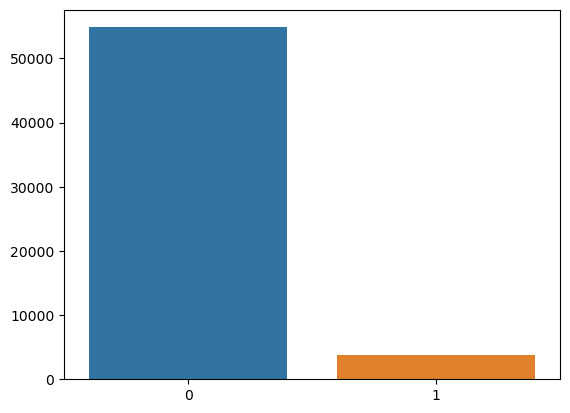

In [9]:
sns.barplot(x = [0, 1], y = [54844, 3784])

In [10]:
from sklearn import preprocessing

In [11]:
for columns in tqdm(df.columns):
    if dict(df.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        df[columns] = label_encoder.fit_transform(df[columns])

  0%|          | 0/44 [00:00<?, ?it/s]

In [12]:
df.shape

(58592, 44)

In [13]:
df.head(20)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0.0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0.0
5,5,1.018709,0.07,0.519231,18,13051,3,4,5,1,...,1,1,1,1,1,0,1,1,3,0.0
6,6,0.097992,0.16,0.403846,19,6112,4,2,6,1,...,0,1,1,1,0,0,1,1,5,0.0
7,7,0.509085,0.14,0.423077,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0.0
8,8,0.282394,0.07,0.298077,19,6112,3,4,5,1,...,1,1,1,1,1,0,1,1,3,0.0
9,9,0.566255,0.04,0.442308,21,17804,1,2,8,2,...,1,1,1,1,1,1,1,1,0,0.0


In [14]:
df.dtypes

policy_id                             int32
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                          int32
population_density                    int64
make                                  int64
segment                               int32
model                                 int32
fuel_type                             int32
max_torque                            int32
max_power                             int32
engine_type                           int32
airbags                               int64
is_esc                                int32
is_adjustable_steering                int32
is_tpms                               int32
is_parking_sensors                    int32
is_parking_camera                     int32
rear_brakes_type                      int32
displacement                          int64
cylinder                              int64
transmission_type               

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['is_claim'], axis=1), df['is_claim'], test_size=0.3, shuffle=True)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41014, 43), (17578, 43), (41014,), (17578,))

In [18]:
y_train

1016     0.0
20111    0.0
48126    0.0
16109    1.0
4441     NaN
        ... 
325      0.0
26438    0.0
14101    0.0
40367    0.0
4685     1.0
Name: is_claim, Length: 41014, dtype: float64

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

In [24]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), KNeighborsClassifier()]
model_names = ['DecisionTreeClassifier()', 'RandomForestClassifier()', 'AdaBoostClassifier()', 'MLPClassifier()', 'KNeighborsClassifier()']

In [25]:
for i, model in tqdm(enumerate(models)):
    model.fit(X_train, y_train)
    print(f'{model_names[i]}: Accuracy: {model.score(X_test, y_test)}')
    print()

0it [00:00, ?it/s]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='0.1f')

## Cheers!